# The Task

The task is to apply a curves filter to an image to create the so called solarization effect.

# The Solution
- Take two parameters (x0, y0) and (x1, y1) and compute a polynomial of third degree which fits these points
- Map the image to this polynomial

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
def read_image_grayscale(filename):
    return cv.imread(filename, 0)

In [3]:
def show_image_greyscale(image):
    plt.imshow(image, cmap='gray')
    plt.show()

To compute the polynomial, we use four equations in a linear system to calculate a, b, c, d for the polynomial `p(x) = ax^3 + bx^2 + cx^1 + d`.

In [4]:
def calculate_polynomial(x1, y1, x2, y2):
    # Calculate polynomial
    a = np.array([[x1 * x1 * x1, x1 * x1, x1, 1],
                  [x2 * x2 * x2, x2 * x2, x2, 1],
                  [3 * x1 * x1, 2 * x1, 1, 0],
                  [3 * x2 * x2, 2 * x2, 1, 0]])
    b = np.array([y1, y2, 0, 0])
    e = np.linalg.solve(a, b)
    return e

We define a function to map our image to the polynomial.

In [5]:
def adjust_image(polynomial, img):
    assert len(polynomial) == 4

    # grab the image dimensions
    h = img.shape[0]
    w = img.shape[1]

    for y in range(0, h):
        for x in range(0, w):
            c = img[y, x]
            value = polynomial[0] * pow(c, 3) + polynomial[1] * pow(c, 2) + polynomial[2] * c + polynomial[3]
            img[y, x] = value

    return img

In [6]:
def visualize_polynomial(polynomial, low=0, high=255):
    values = [polynomial[0] * pow(c, 3) + polynomial[1] * pow(c, 2) + polynomial[2] * c + polynomial[3]
              for c in range(low, high)]
    plt.plot(values)
    plt.show()

Let's test it on a few examples.

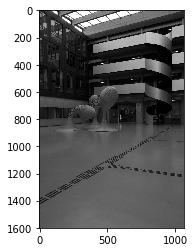

In [7]:
img = read_image_grayscale("images/apb.jpg")
show_image_greyscale(img)

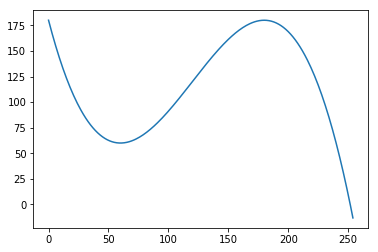

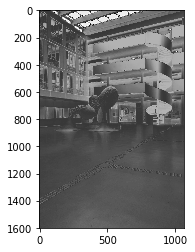

In [8]:
polynomial = calculate_polynomial(60, 60, 180, 180)
solarized_img = adjust_image(polynomial, img)
visualize_polynomial(polynomial)
show_image_greyscale(solarized_img)

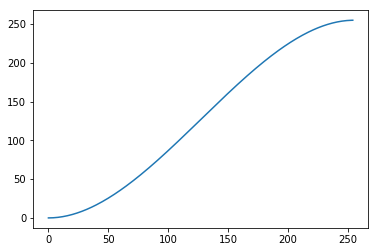

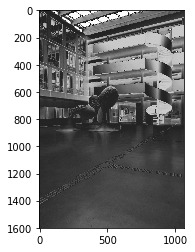

In [9]:
polynomial = calculate_polynomial(0, 0, 255, 255)
solarized_img = adjust_image(polynomial, img)
visualize_polynomial(polynomial)
show_image_greyscale(solarized_img)